In [1]:
from sympy import *
from sympy.solvers.solveset import solveset
init_printing()
x, y, z = symbols('x,y,z')

## Solveset

Equation solving is both a common need also a common building block for more complicated symbolic algorithms.  

Here we introduce the `solveset` function.

In [2]:
solveset(x**2 - 4, x)

Solveset takes two arguments and one optional argument specifying the domain, an equation like $x^2 - 4$ and a variable on which we want to solve, like $x$ and an optional argument domain specifying the region in which we want to solve.

Solveset returns the values of the variable, $x$, for which the equation, $x^2 - 4$ equals 0.

### Exercise

What would the following code produce?  Are you sure?

In [3]:
solveset(x**2 - 9 == 0, x)

## Infinite Solutions

One of the major improvements of `solveset` is that it also supports infinite solution.

In [12]:
solveset(sin(x), x)

## Domain argument

In [14]:
solveset(exp(x) -1, x)

`solveset` by default solves everything in the complex domain. In complex domain $exp(x) == cos(x) + i\ sin(x)$ and solution is basically equal to solution to $cos(x) == 1$. If you want only real solution, you can specify the domain as `S.Reals`.

In [15]:
solveset(exp(x) -1, x, domain=S.Reals)

## Symbolic use of `solveset`

Results of `solveset` don't need to be numeric, like `{-2, 2}`.  We can use solveset to perform algebraic manipulations.  For example if we know a simple equation for the area of a square

    area = height * width
    
we can solve this equation for any of the variables.  For example how would we solve this system for the `height`, given the `area` and `width`?

In [4]:
height, width, area = symbols('height, width, area')
solveset(area - height*width, height)

Note that we would have liked to have written

    solveset(area == height * width, height)
    
But the `==` gotcha bites us.  Instead we remember that `solveset` expects an expression that is equal to zero, so we rewrite the equation

    area = height * width
    
into the equation

    0 = height * width - area
    
and that is what we give to solveset.

### Exercise

Compute the radius of a sphere, given the volume.  Reminder, the volume of a sphere of radius `r` is given by

$$ V = \frac{4}{3}\pi r^3 $$

In [5]:
# Solve for the radius of a sphere, given the volume


You will probably get several solutions, this is fine.  The first one is probably the one that you want.

## Substitution

We often want to substitute in one expression for another.  For this we use the subs method

In [5]:
x**2

In [6]:
# Replace x with y
(x**2).subs({x: y})

### Exercise

Subsitute $x$ for $sin(x)$ in the equation $x^2 + 2\cdot x + 1$

In [8]:
# Replace x with sin(x)



## Subs + Solveset

We can use subs and solve together to plug the solution of one equation into another

In [8]:
# Solve for the height of a rectangle given area and width

soln = list(solveset(area - height*width, height))[0]
soln

In [10]:
# Define perimeter of rectangle in terms of height and width

perimeter = 2*(height + width)

In [11]:
# Substitute the solution for height into the expression for perimeter

perimeter.subs({height: soln})

### Exercise

In the last section you solved for the radius of a sphere given its volume

In [12]:
V, r = symbols('V,r', real=True)
4*pi/3 * r**3

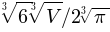

In [13]:
list(solveset(V - 4*pi/3 * r**3, r))[0]

Now lets compute the surface area of a sphere in terms of the volume.  Recall that the surface area of a sphere is given by

$$ 4 \pi r^2 $$

In [14]:
(?).subs(?)

SyntaxError: invalid syntax (<ipython-input-14-df38c236f23a>, line 1)

Does the expression look right?  How would you expect the surface area to scale with respect to the volume?  What is the exponent on $V$?

## Plotting

SymPy can plot expressions easily using the `plot` function.  By default this links against matplotlib.

In [15]:
%matplotlib inline

/home/hargup/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


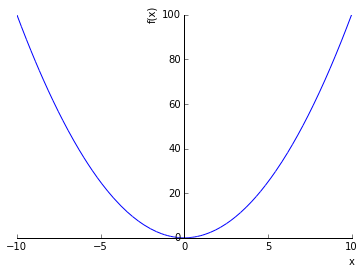

In [16]:
plot(x**2)

### Exercise

In the last exercise you derived a relationship between the volume of a sphere and the surface area.  Plot this relationship using `plot`.

In [17]:
plot(?)

SyntaxError: invalid syntax (<ipython-input-17-a1af7a9b012a>, line 1)

## Low dependencies

You may know that SymPy tries to be a very low-dependency project.  Our user base is very broad.  Some entertaining aspects result.  For example, `textplot`.

In [18]:
textplot(x**2, -3, 3)

      9 |                                                        
        |  .                                                    /
        |   \                                                  / 
        |    \                                                /  
        |     \                                              /   
        |      \                                            .    
        |       \                                                
        |        \                                        ..     
4.50149 | --------\--------------------------------------/-------
        |          \                                    /        
        |           \                                  /         
        |            \                                /          
        |             ..                            ..           
        |               \                          /             
        |                ..                      ..              
        | 

### Exercise

Play with `textplot` and enjoy :)